# Practica 9
Carlos Saiz Hernández

## Librerias


In [38]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import random

## 1. Preferential Attachment model

In [39]:
def preferentialAttachment(N:int, m0:int, m:int):
    G = nx.complete_graph(m0)
    nodes = list(G.nodes)
    
    for i in range(m0, N):
        targets = set()
        
        while len(targets) < m:
            node = random.choice(nodes)
            
            if node not in targets:
                targets.add(node)
                
        G.add_node(i)
        
        for node in targets:
            G.add_edge(i, node)
            nodes.append(i)
            nodes.append(node)
    return G

## 2. Distribución de grado

### 2.1 Representación del grafo

In [40]:
def representarGrafo(G):
    degree_sequence = [d for n, d in G.degree()]
    plt.hist(degree_sequence, bins='auto')
    plt.title("Degree distribution")
    plt.show()

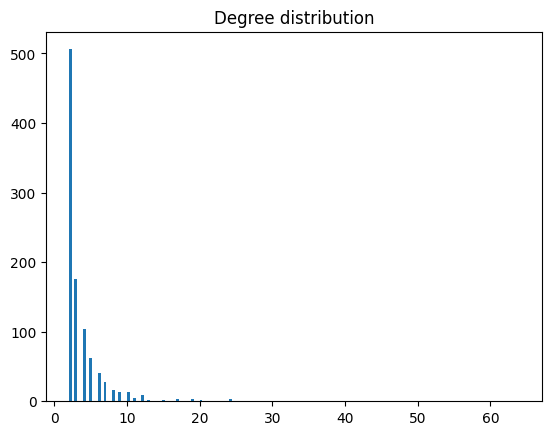

In [41]:
G = preferential_attachment(1000, 3, 2)
representarGrafo(G)

### 2.2 (Opcional) Estimación

In [42]:
def estimacionPowerLawExponente(G):
    grados = [d for n, d in G.degree()]
    xmin = min(grados)
    xi = [x / xmin for x in grados if x >= xmin]
    ln_xi = np.log(xi)
    alpha = 1 + len(xi) / sum(ln_xi)
    print(f'Estimación: {alpha}')
    
    bins = 2**np.arange(1, np.log2(np.max(grados)))
    frecuencias, bins = np.histogram(grados, bins=bins, density=True)

    # Calculamos los logaritmos de los grados y las frecuencias
    log_bins = np.log(bins[1:])
    log_frecuencias = np.log(frecuencias + 1e-10)  # Agrega un pequeño valor para evitar tomar el logaritmo de cero

    # Calculamos la regresión lineal
    slope, intercept, _,_,_ = scipy.stats.linregress(log_bins, log_frecuencias)

    # Dibujamos los datos
    plt.scatter(log_bins, log_frecuencias, label='Datos')

    # Dibujamos la línea de regresión
    x = np.linspace(min(log_bins), max(log_bins), 100)
    y = slope * x + intercept
    plt.plot(x, y, color='red', label='Ajuste lineal')

    # Etiquetas y título
    plt.xlabel('Logaritmo del grado')
    plt.ylabel('Logaritmo de la frecuencia')
    plt.title('Ajuste lineal de la distribución de grado en escala logarítmica')

    # Leyenda
    plt.legend()

    # Se muestra el gráfico
    plt.show()
    


Estimación: 3.2882726517470973


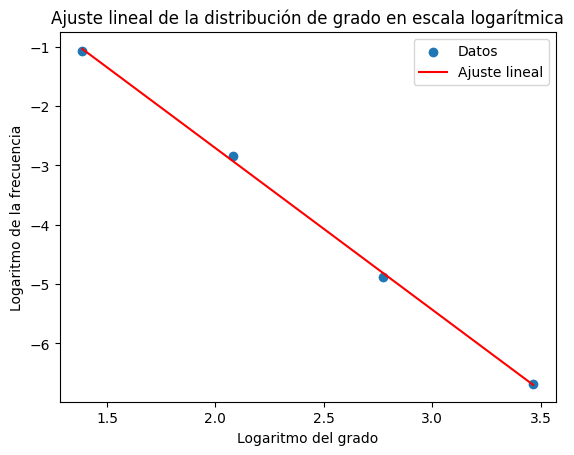

In [43]:
estimacionPowerLawExponente(G)